<a href="https://colab.research.google.com/github/joshiaastha/Sales-Management-Data-Analysis/blob/main/ETL_TheInternAcademy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **AASTHA**

In [ ]:
#from google.colab import drive
from google.colab import files
import pandas as pd
upload = files.upload()

Saving SALESDATA.xls to SALESDATA (1).xls


Importing relevant libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

Import the dataset

In [ ]:
data= pd.read_excel("SALESDATA.xls")

Display first 5 columns of the dataset

In [ ]:
data.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,Unnamed: 20,Unnamed: 21
0,10000481,2017-04-30,-237.91,2017-04-30,100012,NaN,NaN,Urban Large Eggs,2000,0.00,200015,2017-04-30,237.91,0.00,0.0,237.91,237.910000,1,184,EA,NaN,U/M = unit of measure
1,10002220,2017-07-14,368.79,2017-07-14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,200245,2017-07-14,456.17,824.96,0.0,456.17,456.170000,1,127,EA,NaN,NaN
2,10002220,2017-10-17,109.73,2017-10-17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,213157,2017-10-16,438.93,548.66,0.0,438.93,438.930000,1,127,EA,NaN,EA = each
3,10002489,2017-06-03,-211.75,2017-06-03,100096,NaN,NaN,Kiwi Lox,1000,0.00,200107,2017-06-03,211.75,0.00,0.0,211.75,211.750000,1,160,EA,NaN,NaN
4,10004516,2017-05-27,96627.94,2017-05-27,103341,P01,60776,High Top Sweet Onion,1000,408.52,203785,2017-05-28,89248.66,185876.60,0.0,89248.66,196.150901,455,124,SE,NaN,SE = some SI unit like kgs or gallons


Display Information regarding the dataset parameters : 
1.  .info() to get a concise summary of the dataframe
2.  .decribe() to calculate some statistical data like percentile, mean and std of the numerical values of the Series



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65282 entries, 0 to 65281
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   CustKey                           65282 non-null  int64         
 1   DateKey                           65282 non-null  datetime64[ns]
 2   Discount Amount                   65280 non-null  float64       
 3   Invoice Date                      65282 non-null  datetime64[ns]
 4   Invoice Number                    65282 non-null  int64         
 5   Item Class                        56993 non-null  object        
 6   Item Number                       65241 non-null  object        
 7   Item                              65282 non-null  object        
 8   Line Number                       65282 non-null  int64         
 9   List Price                        65282 non-null  float64       
 10  Order Number                      65282 non-nu

In [ ]:
data.describe()

,CustKey,Discount Amount,Invoice Number,Line Number,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,Unnamed: 20
count,6.528200e+04,65280.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65281.000000,65282.000000,65282.000000,0.0
mean,1.001770e+07,1855.574835,216223.662020,23713.849790,514.693380,180583.064352,2852.038373,4707.473613,1660.979228,1191.059145,283.615913,45.084311,137.422398,NaN
std,7.176148e+03,9037.140888,94992.281866,32664.024053,449.189182,67593.871116,15164.342107,20696.443785,9556.485250,5860.787502,252.876719,429.661793,26.643936,NaN
min,1.000045e+07,-255820.800000,100012.000000,1000.000000,0.000000,100838.000000,200.010000,0.000000,0.000000,-3932.930000,-5000.000000,-1.000000,103.000000,NaN
25%,1.001272e+07,246.037500,117931.000000,3000.000000,181.560000,115321.000000,308.387500,561.040000,167.790000,129.950000,100.070000,2.000000,113.000000,NaN
50%,1.001966e+07,441.760000,222869.500000,12000.000000,325.190000,203702.000000,553.940000,998.160000,304.500000,246.490000,183.757500,3.000000,134.000000,NaN
75%,1.002351e+07,999.760000,314318.750000,32000.000000,803.860000,218576.000000,1280.042500,2315.040000,687.320000,579.530000,448.220000,8.000000,160.000000,NaN
max,1.002758e+07,343532.660000,332842.000000,344000.000000,2760.700000,321532.000000,555376.000000,632610.160000,366576.000000,188800.000000,6035.000000,16000.000000,185.000000,NaN


The number of rows and columns in the dateset and the column names

In [ ]:
print(data.shape)
print("-------------------")
print(data.columns)
print("-------------------")

(65282, 22)
-------------------
Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Class', 'Item Number', 'Item', 'Line Number',
       'List Price', 'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M', 'Unnamed: 20', 'Unnamed: 21'],
      dtype='object')
-------------------


Check for duplicated values

In [ ]:
data.duplicated().sum()

0

Identifying Null values

In [ ]:
print("Missing Values: \n", data.isnull().sum());
print("--------------------------------------")
print("Unique Values: \n", data.nunique());

Missing Values: 
 CustKey                                 0
DateKey                                 0
Discount Amount                         2
Invoice Date                            0
Invoice Number                          0
Item Class                           8289
Item Number                            41
Item                                    0
Line Number                             0
List Price                              0
Order Number                            0
Promised Delivery Date                  0
Sales Amount                            0
Sales Amount Based on List Price        0
Sales Cost Amount                       0
Sales Margin Amount                     0
Sales Price                             1
Sales Quantity                          0
Sales Rep                               0
U/M                                     0
Unnamed: 20                         65282
Unnamed: 21                         65278
dtype: int64
--------------------------------------
Unique

**Inference:**

*   **2** NULL values in **Discount Amount**
*   **8289** NULL values in **Item Class** 
*   **41** NULL values in **Item Class**
*   **1** NULL value in **Sales Price**
*   **65282** NULL values in **Unnamed: 20**
*   **65278** NULL values in **Unnamed: 21**









Finding out the rows with the NULL values for **Sales Price, Discount Amount** and **Item Number**

In [ ]:
NaN_Filter1 = data['Sales Price'].isnull()
print(data[NaN_Filter1])
print("--------------------------------------")
NaN_Filter2 = data['Discount Amount'].isnull()
print(data[NaN_Filter2])
print("--------------------------------------")
NaN_Filter3 = data['Item Number'].isnull()
print(data[NaN_Filter3])

        CustKey    DateKey  Discount Amount  ... U/M  Unnamed: 20 Unnamed: 21
34889  10016588 2017-08-18              NaN  ...  EA          NaN         NaN

[1 rows x 22 columns]
--------------------------------------
        CustKey    DateKey  Discount Amount  ... U/M  Unnamed: 20 Unnamed: 21
86     10021160 2017-06-13              NaN  ...  EA          NaN         NaN
34889  10016588 2017-08-18              NaN  ...  EA          NaN         NaN

[2 rows x 22 columns]
--------------------------------------
        CustKey    DateKey  ...  Unnamed: 20            Unnamed: 21
0      10000481 2017-04-30  ...          NaN  U/M = unit of measure
3      10002489 2017-06-03  ...          NaN                    NaN
5      10004516 2017-05-30  ...          NaN                    NaN
18     10009652 2017-05-14  ...          NaN                    NaN
31     10010914 2017-10-21  ...          NaN                    NaN
81     10017638 2017-08-15  ...          NaN                    NaN
82     100

Printing columns on row number 34889

In [ ]:
print(data.iloc[34889])
# Item Class: P01
# Item Number: 29268
# Check the cell below to get the above values.

CustKey                                        10016588
DateKey                             2017-08-18 00:00:00
Discount Amount                                     NaN
Invoice Date                        2017-08-18 00:00:00
Invoice Number                                   110753
Item Class                                          NaN
Item Number                                         NaN
Item                                  Monarch Manicotti
Line Number                                        2000
List Price                                            0
Order Number                                     208991
Promised Delivery Date              2017-08-18 00:00:00
Sales Amount                                     401.86
Sales Amount Based on List Price                      0
Sales Cost Amount                                     0
Sales Margin Amount                              401.86
Sales Price                                         NaN
Sales Quantity                                  

In [ ]:
# print(data[data["Item"]=="Monarch Manicotti"])
print(data.iloc[20590])  # 18746, 20590 locations have the above item.

CustKey                                        10000475
DateKey                             2019-05-21 00:00:00
Discount Amount                                  282.43
Invoice Date                        2019-05-21 00:00:00
Invoice Number                                   301743
Item Class                                          P01
Item Number                                       29268
Item                                  Monarch Manicotti
Line Number                                        7000
List Price                                        42.98
Order Number                                     101870
Promised Delivery Date              2019-05-20 00:00:00
Sales Amount                                     233.33
Sales Amount Based on List Price                 515.76
Sales Cost Amount                                113.79
Sales Margin Amount                              119.54
Sales Price                                     19.4442
Sales Quantity                                  

Identifying the percentage of NULL values with respect to the column

In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '% missing'])
missing_data.head(5)

,Total,% missing
Unnamed: 20,65282,100.0
Unnamed: 21,65278,100.0
Item Class,8289,12.7
Item Number,41,0.1
Discount Amount,2,0.0


Now we observe that since Unnamed: 20 and Unnamed: 21 do not have any values at all, we can remove these two columns entirely. 

We also notice the % of missing values wrt Item Class, tem Number and Discount amount to see whether to remove these columns of replace the null values

Remove Unnamed columns

In [ ]:
data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
0,10000481,2017-04-30,-237.91,2017-04-30,100012,NaN,NaN,Urban Large Eggs,2000,0.00,200015,2017-04-30,237.91,0.00,0.00,237.91,237.910000,1,184,EA
1,10002220,2017-07-14,368.79,2017-07-14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,200245,2017-07-14,456.17,824.96,0.00,456.17,456.170000,1,127,EA
2,10002220,2017-10-17,109.73,2017-10-17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,213157,2017-10-16,438.93,548.66,0.00,438.93,438.930000,1,127,EA
3,10002489,2017-06-03,-211.75,2017-06-03,100096,NaN,NaN,Kiwi Lox,1000,0.00,200107,2017-06-03,211.75,0.00,0.00,211.75,211.750000,1,160,EA
4,10004516,2017-05-27,96627.94,2017-05-27,103341,P01,60776,High Top Sweet Onion,1000,408.52,203785,2017-05-28,89248.66,185876.60,0.00,89248.66,196.150901,455,124,SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65277,10017638,2018-03-21,505.78,2018-03-21,226497,P01,13447,High Top Oranges,8000,119.52,320895,2018-03-21,569.90,1075.68,239.95,329.95,63.322222,9,180,EA
65278,10017638,2018-03-21,410.75,2018-03-21,226497,P01,25906,Landslide White Sugar,38000,436.78,320895,2018-03-21,462.81,873.56,423.55,39.26,231.405000,2,180,EA
65279,10017638,2018-03-21,876.16,2018-03-21,226497,P01,61856,Moms Potato Salad,227001,232.92,320895,2018-03-21,987.20,1863.36,574.00,413.20,123.400000,8,180,EA
65280,10017638,2018-03-21,24226.77,2018-03-21,226498,P01,17801,Better Fancy Canned Sardines,1000,1431.23,320907,2018-03-21,27297.51,51524.28,16188.90,11108.61,758.264167,36,180,EA


Drop Values in Columns Item Class and Item Number as they are useless

---



In [ ]:
data.drop(['Item Class','Item Number'],axis=1,inplace=True)

Checkcing whether the columns have been dropped

In [ ]:
data

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
0,10000481,2017-04-30,-237.91,2017-04-30,100012,Urban Large Eggs,2000,0.00,200015,2017-04-30,237.91,0.00,0.00,237.91,237.910000,1,184,EA
1,10002220,2017-07-14,368.79,2017-07-14,100233,Moms Sliced Turkey,1000,824.96,200245,2017-07-14,456.17,824.96,0.00,456.17,456.170000,1,127,EA
2,10002220,2017-10-17,109.73,2017-10-17,116165,Cutting Edge Foot-Long Hot Dogs,1000,548.66,213157,2017-10-16,438.93,548.66,0.00,438.93,438.930000,1,127,EA
3,10002489,2017-06-03,-211.75,2017-06-03,100096,Kiwi Lox,1000,0.00,200107,2017-06-03,211.75,0.00,0.00,211.75,211.750000,1,160,EA
4,10004516,2017-05-27,96627.94,2017-05-27,103341,High Top Sweet Onion,1000,408.52,203785,2017-05-28,89248.66,185876.60,0.00,89248.66,196.150901,455,124,SE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65277,10017638,2018-03-21,505.78,2018-03-21,226497,High Top Oranges,8000,119.52,320895,2018-03-21,569.90,1075.68,239.95,329.95,63.322222,9,180,EA
65278,10017638,2018-03-21,410.75,2018-03-21,226497,Landslide White Sugar,38000,436.78,320895,2018-03-21,462.81,873.56,423.55,39.26,231.405000,2,180,EA
65279,10017638,2018-03-21,876.16,2018-03-21,226497,Moms Potato Salad,227001,232.92,320895,2018-03-21,987.20,1863.36,574.00,413.20,123.400000,8,180,EA
65280,10017638,2018-03-21,24226.77,2018-03-21,226498,Better Fancy Canned Sardines,1000,1431.23,320907,2018-03-21,27297.51,51524.28,16188.90,11108.61,758.264167,36,180,EA


### **ARUNA**

Replace NULL values in Discount Amount with Mean

In [ ]:
data['Discount Amount'].fillna(data['Discount Amount'].mean(),inplace=True)
data['Discount Amount']

0         -237.91
1          368.79
2          109.73
3         -211.75
4        96627.94
           ...   
65277      505.78
65278      410.75
65279      876.16
65280    24226.77
65281    24479.26
Name: Discount Amount, Length: 65282, dtype: float64

Replace NULL values in Sales Amount with Mean

In [ ]:
data['Sales Amount'].fillna(data['Sales Amount'].mean(),inplace=True)
data['Sales Amount']

0          237.91
1          456.17
2          438.93
3          211.75
4        89248.66
           ...   
65277      569.90
65278      462.81
65279      987.20
65280    27297.51
65281    27582.02
Name: Sales Amount, Length: 65282, dtype: float64

Replace NULL values in Sales Price with Mean

In [ ]:
data['Sales Price'].fillna(data['Sales Price'].mean(),inplace=True)
data['Sales Price']

0        237.910000
1        456.170000
2        438.930000
3        211.750000
4        196.150901
            ...    
65277     63.322222
65278    231.405000
65279    123.400000
65280    758.264167
65281    574.625417
Name: Sales Price, Length: 65282, dtype: float64

In [ ]:
print("Missing Values: \n", data.isnull().sum()); 

Missing Values: 
 CustKey                             0
DateKey                             0
Discount Amount                     0
Invoice Date                        0
Invoice Number                      0
Item                                0
Line Number                         0
List Price                          0
Order Number                        0
Promised Delivery Date              0
Sales Amount                        0
Sales Amount Based on List Price    0
Sales Cost Amount                   0
Sales Margin Amount                 0
Sales Price                         0
Sales Quantity                      0
Sales Rep                           0
U/M                                 0
dtype: int64


**Inference:** We have removed/replaced all the NULL vlaues in the dataset, now it is suitable for performing various operations

Removing all rows with **Discount Amounts less than 0**.

In [ ]:
data= data.drop(data[data['Discount Amount']<0].index, inplace = False)

Removing all rows with **Sales Price than 0**.

In [ ]:
data= data.drop(data[data['Sales Price']<0].index, inplace = False)


In [ ]:
data

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
1,10002220,2017-07-14,368.790,2017-07-14,100233,Moms Sliced Turkey,1000,824.960,200245,2017-07-14,456.17,824.960,0.00,456.17,456.170000,1,127,EA
2,10002220,2017-10-17,109.730,2017-10-17,116165,Cutting Edge Foot-Long Hot Dogs,1000,548.660,213157,2017-10-16,438.93,548.660,0.00,438.93,438.930000,1,127,EA
4,10004516,2017-05-27,96627.940,2017-05-27,103341,High Top Sweet Onion,1000,408.520,203785,2017-05-28,89248.66,185876.600,0.00,89248.66,196.150901,455,124,SE
6,10007866,2017-09-03,371.014,2017-09-03,100403,Moms Sliced Turkey,2000,795.314,200436,2017-09-03,424.30,795.314,0.00,424.30,424.300000,1,149,EA
7,10009356,2017-06-18,608.080,2017-06-18,105481,Tell Tale Garlic,29000,575.000,205213,2017-06-18,541.92,1150.000,0.00,541.92,270.960000,2,103,EA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65277,10017638,2018-03-21,505.780,2018-03-21,226497,High Top Oranges,8000,119.520,320895,2018-03-21,569.90,1075.680,239.95,329.95,63.322222,9,180,EA
65278,10017638,2018-03-21,410.750,2018-03-21,226497,Landslide White Sugar,38000,436.780,320895,2018-03-21,462.81,873.560,423.55,39.26,231.405000,2,180,EA
65279,10017638,2018-03-21,876.160,2018-03-21,226497,Moms Potato Salad,227001,232.920,320895,2018-03-21,987.20,1863.360,574.00,413.20,123.400000,8,180,EA
65280,10017638,2018-03-21,24226.770,2018-03-21,226498,Better Fancy Canned Sardines,1000,1431.230,320907,2018-03-21,27297.51,51524.280,16188.90,11108.61,758.264167,36,180,EA


**All Missing Values are removed**



---





## **Sales Trend**

---


Sorting values based on **DateKey**

In [ ]:
data.sort_values(by='DateKey')

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item,Line Number,List Price,Order Number,Promised Delivery Date,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M
195,10022240,2017-01-01,163.0200,2017-01-01,119174,Pearl Chardonnay,19000,123.1400,216701,2017-01-01,206.40,369.4200,37.68,168.72,68.800000,3,111,EA
142,10000460,2017-01-01,158.0400,2017-01-01,119156,Nationeel Salted Pretzels,8000,181.4400,216666,2017-01-01,204.84,362.8800,59.73,145.11,102.420000,2,154,SE
143,10000460,2017-01-01,420.9000,2017-01-01,119156,Ebony Prepared Salad,4000,966.4400,216666,2017-01-01,545.54,966.4400,278.38,267.16,545.540000,1,154,EA
144,10000460,2017-01-01,663.4100,2017-01-01,119156,Thresher Spicy Mints,9000,507.7500,216666,2017-01-01,859.84,1523.2500,488.68,371.16,286.613333,3,154,EA
145,10000460,2017-01-01,179.4500,2017-01-01,119156,Big Time Frozen Cheese Pizza,12000,412.0300,216666,2017-01-01,232.58,412.0300,84.23,148.35,232.580000,1,154,EA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58315,10019194,2019-12-31,1265.5200,2019-12-31,329620,Shady Lake Thai Rice,225000,250.0000,124046,2019-12-31,1234.48,2500.0000,581.85,652.63,123.448000,10,108,EA
58316,10019194,2019-12-31,309.8800,2019-12-31,329620,Special Grits,111000,76.5200,124046,2019-12-31,302.28,612.1600,183.96,118.32,37.785000,8,108,EA
58317,10019194,2019-12-31,2329.4396,2019-12-31,329620,Golden Frozen Chicken Thighs,120000,1150.4399,124046,2019-12-31,2272.32,4601.7596,1257.08,1015.24,568.080000,4,108,EA
58309,10019194,2019-12-31,1932.1900,2019-12-31,329620,Fast BBQ Potato Chips,142000,190.8500,124046,2019-12-31,1884.81,3817.0000,852.64,1032.17,94.240500,20,108,EA


Finding unique Months from DateKey

In [ ]:
data['Month']=data['DateKey'].apply(lambda x: x.strftime('%m'))
data['Month'].unique()

array(['07', '10', '05', '09', '06', '08', '11', '01', '02', '03', '04',
       '12'], dtype=object)

Finding Unique Year From DateKey

In [ ]:
data['Year']=data['DateKey'].apply(lambda x: x.strftime('%Y'))
data['Year'].unique()
#data['Year'][1]

array(['2017', '2019', '2018'], dtype=object)

Finding unique Month Year From DateKey

In [ ]:
data['Month_Year']=data['DateKey'].apply(lambda x: x.strftime('%Y,%m'))
data['Month_Year'].unique()

array(['2017,07', '2017,10', '2017,05', '2017,09', '2017,06', '2017,08',
       '2017,11', '2017,01', '2019,01', '2019,02', '2017,02', '2019,03',
       '2017,03', '2019,04', '2017,04', '2019,05', '2019,06', '2019,07',
       '2019,08', '2019,09', '2019,10', '2019,11', '2019,12', '2017,12',
       '2018,01', '2018,02', '2018,03'], dtype=object)

## Month Wise Sales Trend

In [ ]:
data_trend_mon = data.groupby('Month').sum()['Sales Amount'].reset_index()

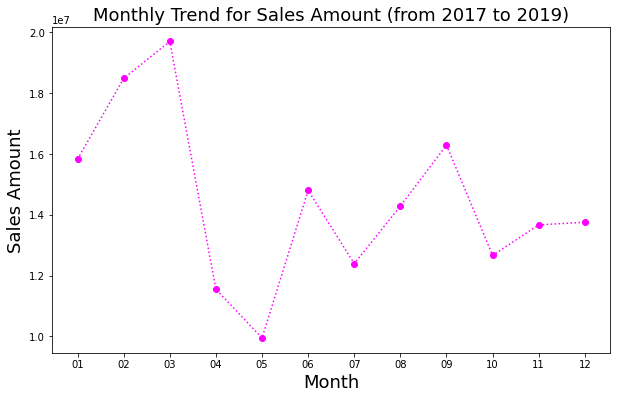

In [ ]:
fig,ax=plt.subplots(figsize=(10, 6))
plt.plot(data_trend_mon['Month'],data_trend_mon['Sales Amount'],color='Magenta', marker='o',linestyle='dotted')
plt.ylabel('Sales Amount',fontsize=18)
plt.xlabel('Month',fontsize=18)
plt.title('Monthly Trend for Sales Amount (from 2017 to 2019)',fontsize=18)
plt;

**Inference:** From the 3 years, the Highest sales amount was obtained during the month of *March*, Lowest during *May*

## Year wise sales Trend

In [ ]:
data_trend_year = data.groupby('Year').sum()['Sales Amount'].reset_index()

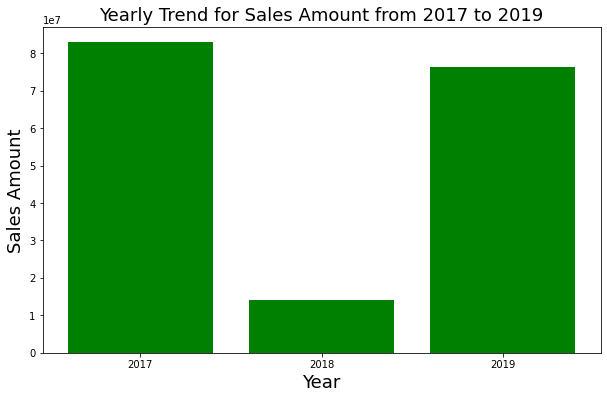

In [ ]:

fig,ax=plt.subplots(figsize=(10, 6))
plt.bar(data_trend_year['Year'],data_trend_year['Sales Amount'],color='Green')
plt.ylabel('Sales Amount',fontsize=18)
plt.xlabel('Year',fontsize=18)
plt.title('Yearly Trend for Sales Amount from 2017 to 2019',fontsize=18)
plt;

**Inference:** The lowest Sales Amount was obtained in the year *2018* among 2017,2018 and 2019

## Month Year wise Sales Trend

In [ ]:
data_trend_mon_year = data.groupby('Month_Year').sum()['Sales Amount'].reset_index()

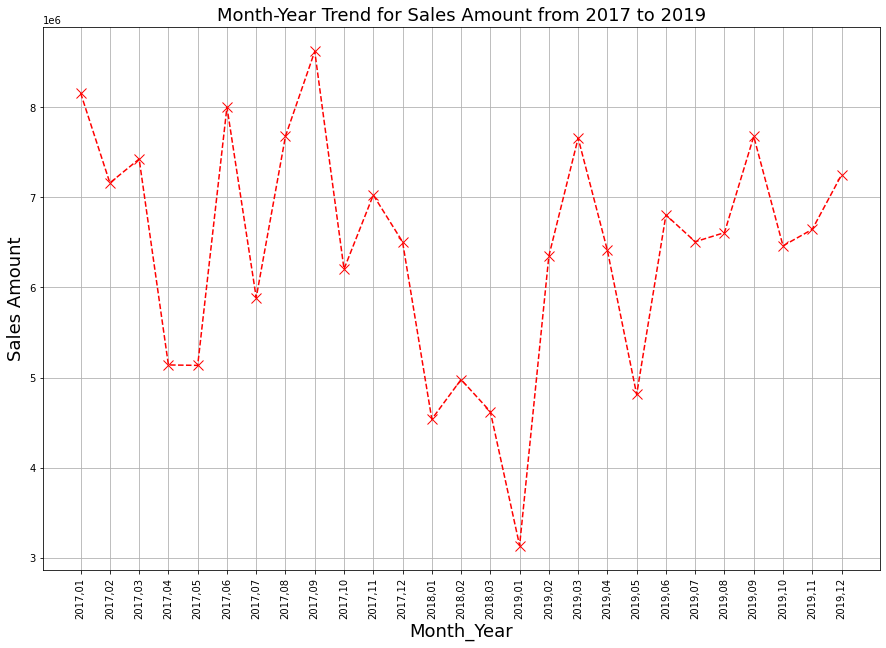

In [ ]:

fig,ax=plt.subplots(figsize=(15, 10))
plt.grid()
plt.plot(data_trend_mon_year['Month_Year'],data_trend_mon_year['Sales Amount'],color='Red',marker='x',linestyle='dashed',markersize=10)
plt.ylabel('Sales Amount', fontsize=18)
plt.xlabel('Month_Year', fontsize=18)
plt.xticks(rotation=90)
plt.title('Month-Year Trend for Sales Amount from 2017 to 2019', fontsize=18)
plt;

**Inference:** The Minimum sales amount was during *January 2019* and the maximum during *September 2017*



### **AVANTHIKA**

## Taking values for a specific year
We observed data during 2017



In [ ]:
data_date = data.set_index('DateKey')

In [ ]:
data_date.loc['2017'].nunique()

CustKey                               454
Discount Amount                      7809
Invoice Date                          256
Invoice Number                      11257
Item                                  619
Line Number                           397
List Price                           1044
Order Number                         8117
Promised Delivery Date                269
Sales Amount                         8263
Sales Amount Based on List Price     3950
Sales Cost Amount                    5353
Sales Margin Amount                 10353
Sales Price                          6377
Sales Quantity                        253
Sales Rep                              64
U/M                                     3
Month                                  12
Year                                    1
Month_Year                             12
dtype: int64

Sales Amount vs Date for the year 2017

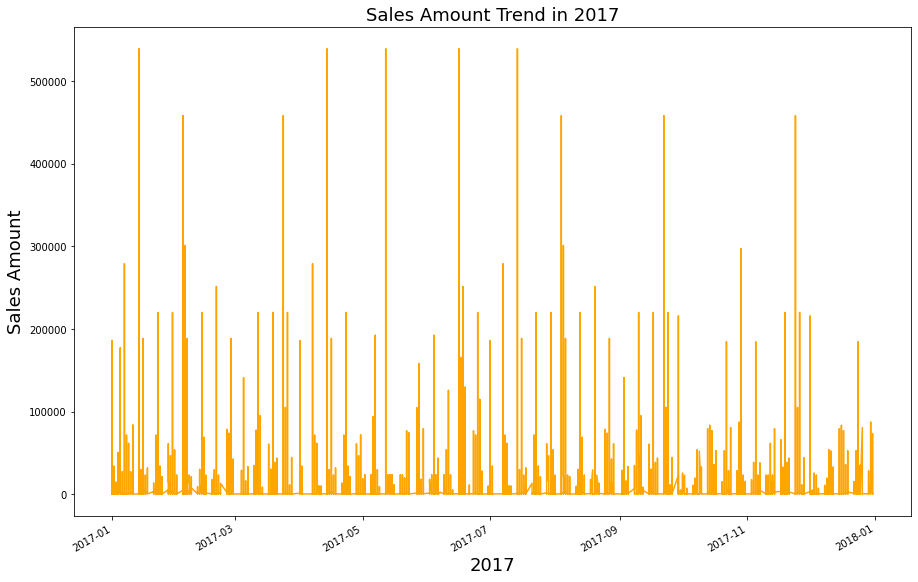

In [ ]:
fig,ax=plt.subplots(figsize=(15, 10))
data_date.loc['2017','Sales Amount'].plot(color='Orange');
plt.ylabel('Sales Amount', fontsize=18)
plt.xlabel('2017', fontsize=18)
plt.title('Sales Amount Trend in 2017', fontsize=18)
plt;

Specify Item and Sales Amount for a certain date : 2019-12-31

In [ ]:
dataItem= data.loc[data['DateKey'] == '2019-12-31',["DateKey","Item","Sales Amount","Sales Quantity"]]
dataItem

,DateKey,Item,Sales Amount,Sales Quantity
58176,2019-12-31,Washington Cranberry Juice,653.92,55
58177,2019-12-31,Fast Lemon Cookies,540.21,40
58178,2019-12-31,Even Better Strawberry Yogurt,791.36,1
58179,2019-12-31,Even Better Chocolate Milk,733.80,1
58180,2019-12-31,Gorilla String Cheese,313.08,2
...,...,...,...,...
58470,2019-12-31,Better Fancy Canned Sardines,6540.36,174
58471,2019-12-31,Monarch Spaghetti,13158.10,340
58472,2019-12-31,Moms Cole Slaw,630.23,24
58473,2019-12-31,Swell Canned Peaches,10743.32,785


Sorting the values according to Item Name

In [ ]:
dataItemSort= dataItem.sort_values("Item")
dataItemSort

,DateKey,Item,Sales Amount,Sales Quantity
58381,2019-12-31,American Pimento Loaf,271.93,1
58384,2019-12-31,American Pimento Loaf,261.05,1
58454,2019-12-31,American Pimento Loaf,255.61,1
58289,2019-12-31,Applause Canned Mixed Fruit,247.04,4
58443,2019-12-31,Atomic Mint Chocolate Bar,1317.69,2
...,...,...,...,...
58283,2019-12-31,Walrus Imported Beer,493.80,4
58215,2019-12-31,Walrus Light Beer,468.71,3
58458,2019-12-31,Walrus Light Beer,757.27,5
58176,2019-12-31,Washington Cranberry Juice,653.92,55


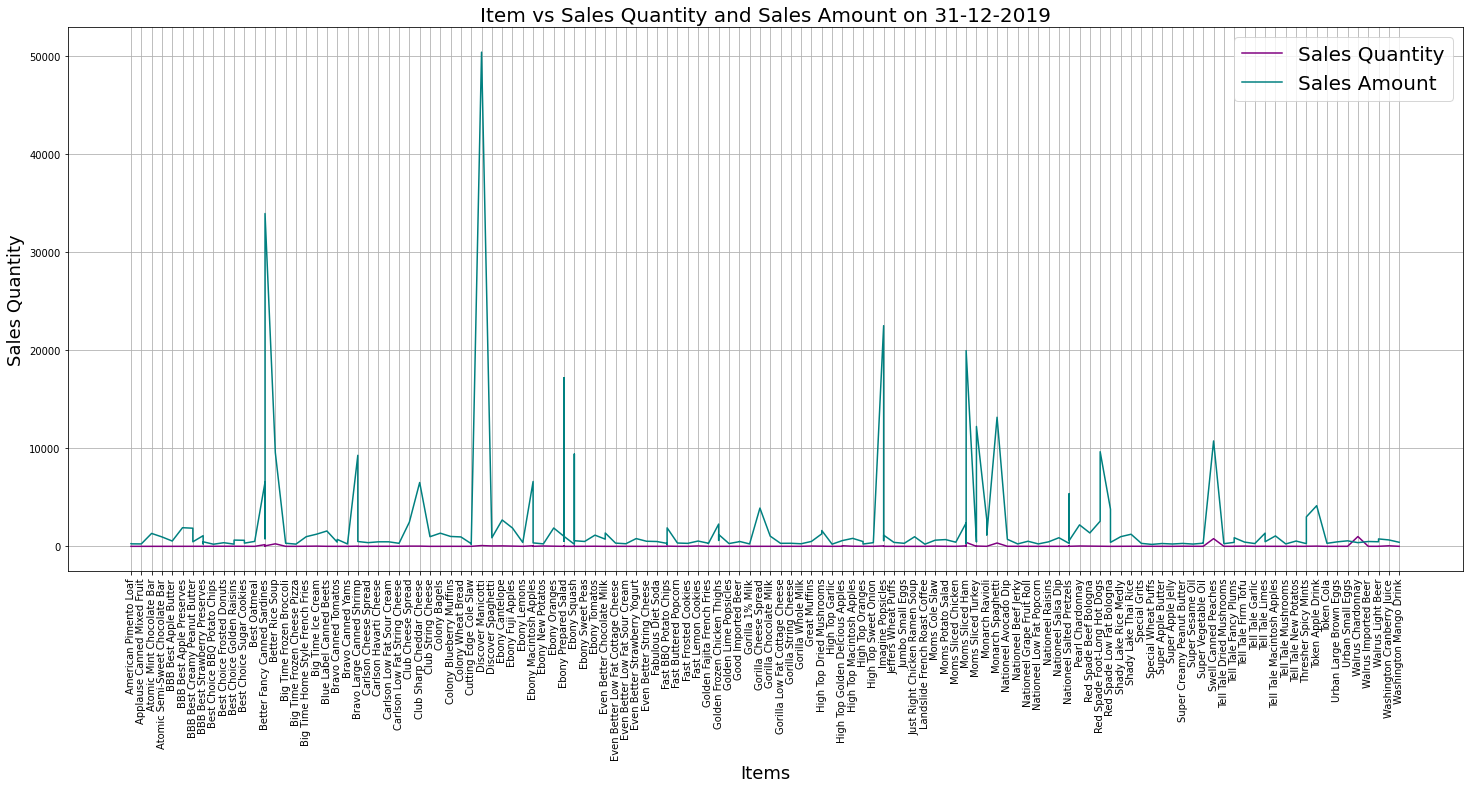

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
#plot Item vs Sales PriceQuantity and Sales Amount
plt.plot(dataItemSort['Item'],dataItemSort['Sales Quantity'],label='Sales Quantity',color='purple')
plt.plot(dataItemSort['Item'],dataItemSort['Sales Amount'],label='Sales Amount',color='teal')
plt.xticks(rotation=90)
plt.legend( prop={'size': 20})
plt.title('Item vs Sales Quantity and Sales Amount on 31-12-2019', fontsize=20)
plt.xlabel('Items', fontsize=18)
plt.ylabel('Sales Quantity', fontsize=18)
plt.grid()
plt.show()

**Inference:** Discover Manicotti has gained the highest Sales Amount while Walrus Chardonney was the most sold item on 31-12-2019


# Pie chart showing the distribution of Unit of Measure per Item

Text(0.5, 1.0, 'Distribution of Units of measure ')

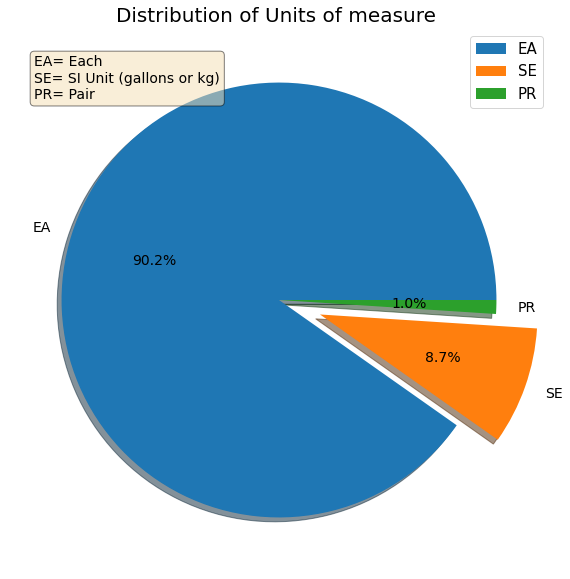

In [ ]:
#Piechart for U/M
fig, ax = plt.subplots(figsize=(10, 10))


categorical_features = ['U/M']
autopct='%1.1f%%'
textprops ={"fontsize":14}
myexplode = [0, 0.2, 0] 
for feature in categorical_features:
 x = data[feature].value_counts()
 labels = data[feature].value_counts().index
 ax.pie(x=x, labels=labels, autopct=autopct,explode = myexplode,shadow = True,textprops=textprops)
plt.legend(fontsize=15)

textstr = '\n'.join((
    r'EA= Each',
    r'SE= SI Unit (gallons or kg)',
    r'PR= Pair'))

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
plt.title('Distribution of Units of measure ',fontsize=20)

**Inference**: Most items (90.4%) were priced individually, 8.6% were priced based on SI units and 1% items were priced in pairs

# Trends among Top 1000 Items based on Sales Amount

In [ ]:
#finding the top 1000items based on Sales Amount
data_large=data.nlargest(1000,"Sales Amount")

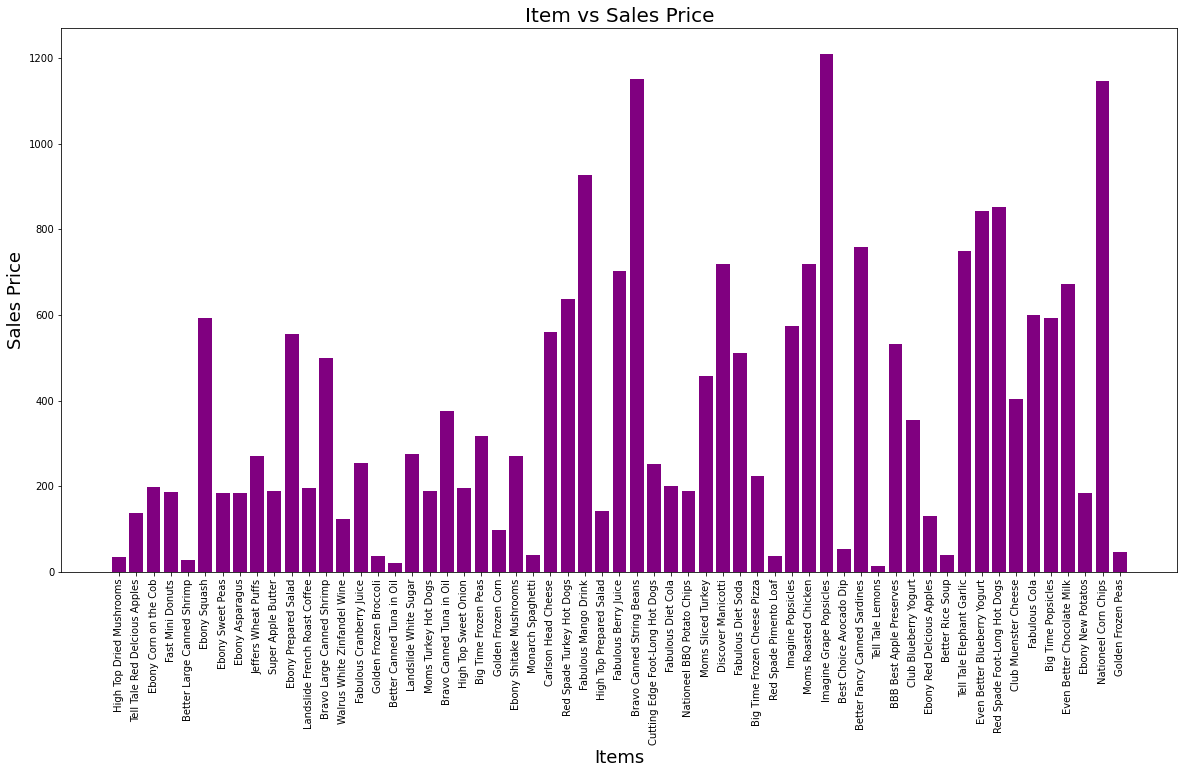

In [ ]:
#couting no. of items 
fig, ax = plt.subplots(figsize=(20, 10))
#plot Item vs Sales Price
plt.bar(data_large['Item'],data_large['Sales Price'],color='purple')
plt.xticks(rotation=90)
plt.title('Item vs Sales Price', fontsize=20)
plt.xlabel('Items', fontsize=18)
plt.ylabel('Sales Price', fontsize=18)
plt.show()

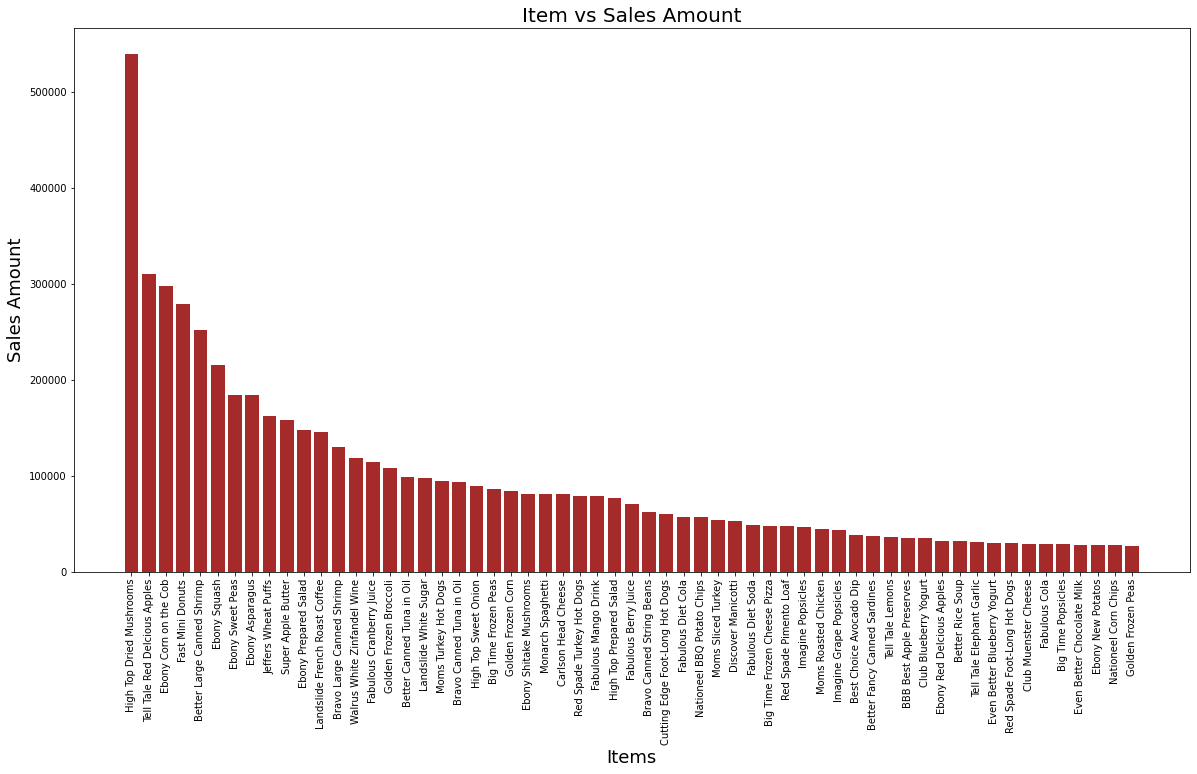

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(data_large['Item'],data_large['Sales Amount'],color='brown')
plt.title('Item vs Sales Amount', fontsize=20)
plt.xlabel('Items', fontsize=18)
plt.ylabel('Sales Amount', fontsize=18)
plt.xticks(rotation=90)
plt.show()

In [ ]:
data_mostItem=data.nlargest(1000,"Sales Quantity")

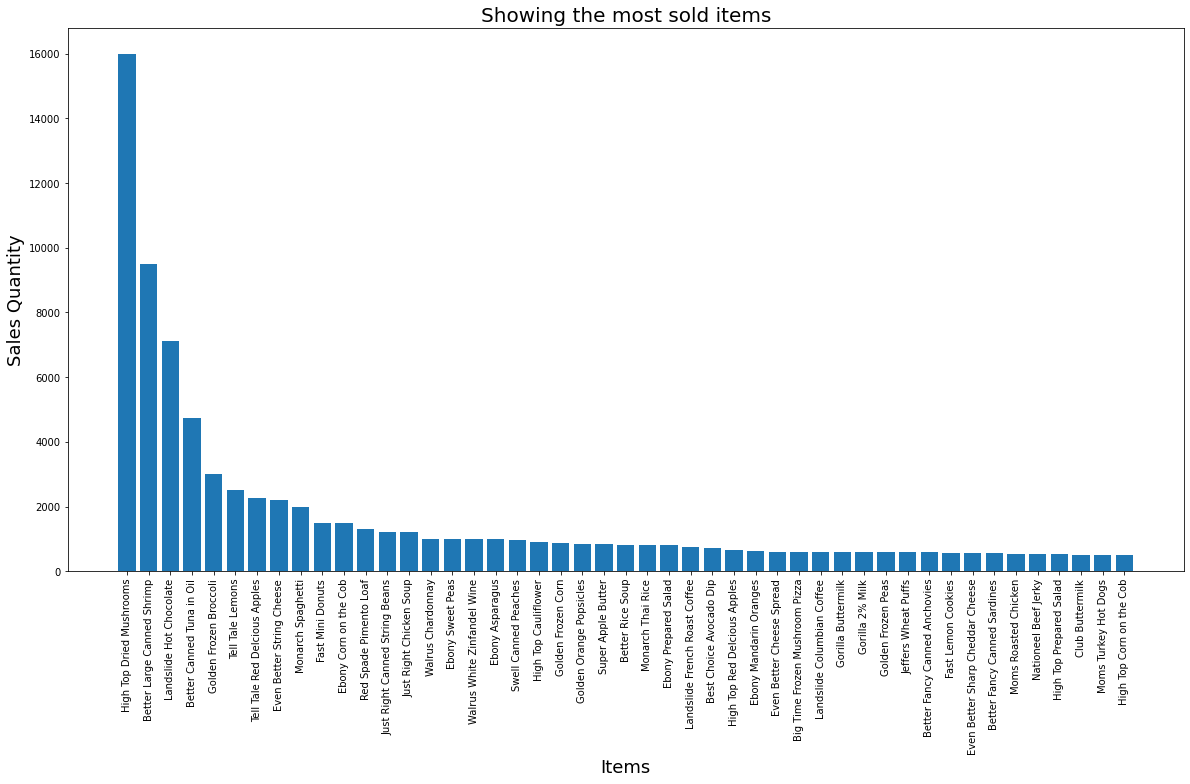

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(data_mostItem['Item'],data_mostItem['Sales Quantity'])
plt.xticks(rotation=90)
plt.title('Showing the most sold items', fontsize=20)
plt.xlabel('Items', fontsize=18)
plt.ylabel('Sales Quantity', fontsize=18)
plt.show()

**Inference:** From the 1st graph we see that 'High top dried mushroom' are very cheap compared to the rest of the best selling Items
From the 2nd graph we see that they have generated the most Sales Amount
From the 3rd graph we see that 'High Top Dried Mushrooms' were sold in the maximum quantity

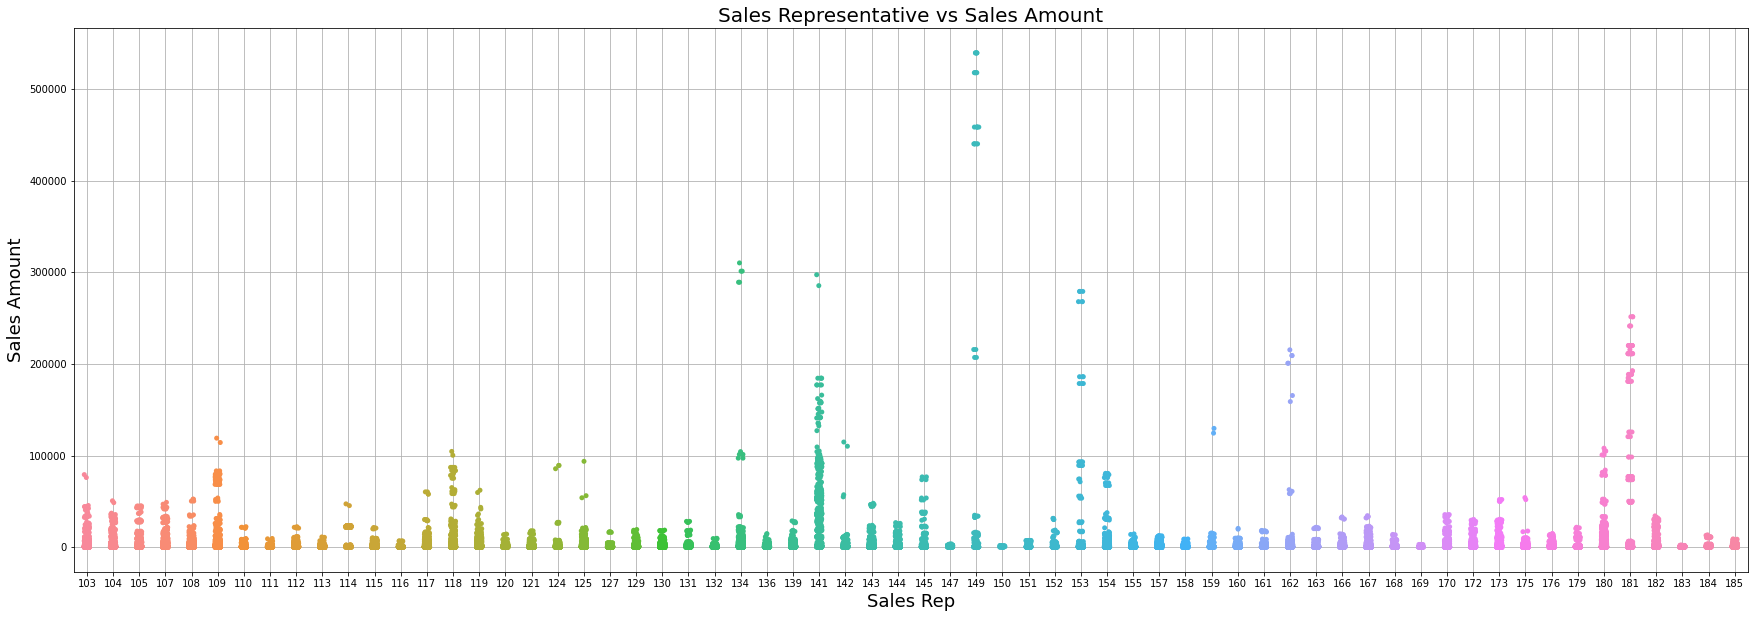

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))
ax = sns.stripplot(x='Sales Rep', y='Sales Amount', data=data)
plt.title('Sales Representative vs Sales Amount', fontsize=20)
plt.xlabel('Sales Rep', fontsize=18)
plt.ylabel('Sales Amount', fontsize=18)
plt.grid()
plt.show()

**Inference:** Highest Sales amount contributed by Sales Reperesentative no. 149

In [ ]:
#finding the top 1000items based on Sales Amount
data_1=data.nlargest(100,"Sales Amount")

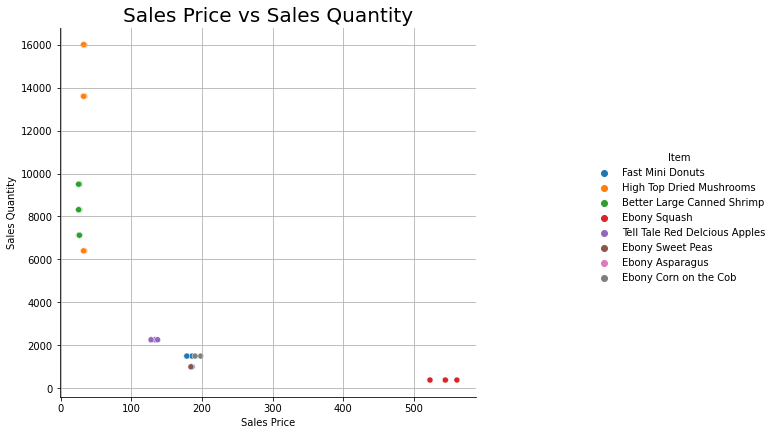

In [ ]:
g=sns.relplot(x=data["Sales Price"], y=data["Sales Quantity"],hue=data_1["Item"])
g.fig.set_size_inches(12,6)
plt.title("Sales Price vs Sales Quantity", loc="center",fontsize=20)
plt.grid()
plt.show()